# TD 4 - Neural networks

## Objectives

The objectives of this practical session are:
- The understanding of neural network features
- The introduction to the neural network library PyTorch
- The creation of a simple neural network for classification
- The implementation or usage of metrics and visualization tools to evaluate the performance of the training

It includes the implementation of:
- The neural network description
- The optimization loop
- The test and evaluation phases

# Neural Networks with Pytorch

## Language and libraries

It is a first contact with [Pytorch](https://pytorch.org/), one of the mainly used Deep Learning frameworks (along with TensorFlow).

PyTorch implements a tensor library, mathematical functions, deep learning layers and utilities for designing and learning complex models.
While most of the following practical session could be coded using Numpy, we will focus on PyTorch for several reasons:
- we can switch to GPU computation if needed (parallel operations on GPU make computation more efficient)
- a lot of optimizers, dataloaders, layers are already coded, which will (in the end, after familiarization with the library) allow fast coding for deep learning models
- coding with at least one deep learning framework is a common job/position requirement

In [9]:
# The standard numpy & visualization libraries
import numpy as np
import matplotlib.pyplot as plt

# Pytorch
import torch

# Library for displaying progress bars
from tqdm import tqdm, tnrange

In [10]:
print("NUMPY ----")
data_np = np.ones((10,7), dtype=np.float32) # defintion of a Matrix shape (10,7) with ones inside
data_np[0] = 0 # set first line to 0
data_np[5:7, 2:3] = 5 # slicing to set the values
print(data_np)
print(np.tanh(data_np)) # call a function
data_np = np.expand_dims(data_np, axis=2) # adding a dimension
print(data_np.shape)
# convert from float to long int
data_np = data_np.astype(np.int64)
# convert from int to float
data_np = data_np.astype(np.float32)

print("PYTORCH ----")
data_pt = torch.ones((10,7), dtype=torch.float)
data_pt[0] = 0
data_pt[5:7, 2:3] = 5
print(data_pt)
print(torch.tanh(data_pt)) # call a function
data_pt = data_pt.unsqueeze(2) # adding a dimension
print(data_pt.shape)
# convert from float to int
data_pt = data_pt.long()
# convert from int to float
data_pt = data_pt.float()

# conversion from PyTorch to Numpy
data = data_pt.numpy()

# conversion from Numpy to PyTorch
data = torch.tensor(data_np)

NUMPY ----
[[0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 5. 1. 1. 1. 1.]
 [1. 1. 5. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
[[0.        0.        0.        0.        0.        0.        0.       ]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.9999092 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.9999092 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]
 [0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942 0.7615942]]
(10, 7, 1)
PYTORC

## Dataset analysis

The following codes generates 6 differrent types of datasets, with various structures.



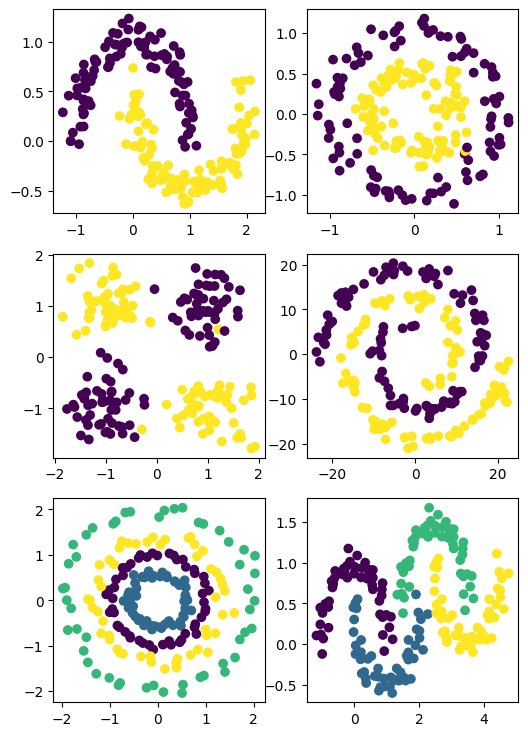

In [11]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.model_selection import train_test_split
import math

def generate_data(data_num, nsamples = 500, random_state = 0):
  if data_num == 0: # Two moons
    X,y  = make_moons(n_samples=nsamples, noise=0.1, random_state=random_state)
  elif data_num == 1: # Two circles
    X,y = make_circles(n_samples=nsamples, factor=0.5, noise=0.1, random_state=random_state)
  elif data_num == 2: # Two sets of two blobs
    X,y = make_blobs(n_samples=nsamples,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                     cluster_std=0.4, random_state=random_state)
    y = y//2
  elif data_num == 3: # Two spirals
    L = 3

    N = nsamples//2
    theta = np.sqrt(np.random.rand(N))*L*math.pi
    r_a = 2*theta + math.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = data_a + np.random.randn(N,2)
    res_a = np.append(x_a, np.zeros((N,1)), axis=1)

    N = nsamples - nsamples//2
    theta = np.sqrt(np.random.rand(N))*L*math.pi
    r_b = -2*theta - math.pi
    data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
    x_b = data_b + np.random.randn(N,2)
    res_b = np.append(x_b, np.ones((N,1)), axis=1)

    res = np.append(res_a, res_b, axis=0)
    np.random.shuffle(res)

    X = res[:,:2]
    y = res[:,2]
  elif data_num == 4: # Four circles
    X,y = make_circles(n_samples=nsamples//2, factor=0.6, noise=0.05, random_state=random_state)
    # ax[1,1].scatter(X[:, 0], X[:, 1], c=y)
    X2,y2 = make_circles(n_samples=nsamples - nsamples//2, factor=0.7, noise=0.05, random_state=random_state+1)
    X = np.vstack((X,2*X2))
    y = np.hstack((y,2+y2))
  elif data_num == 5: # Four moons
    X,y  = make_moons(n_samples=nsamples//2, noise=0.1, random_state=random_state)
    X2,y2  = make_moons(n_samples=nsamples-nsamples//2, noise=0.1, random_state=random_state)
    X2[:, 0] += 2.5
    X2[:, 1] += 0.5
    X = np.vstack((X,X2))
    y = np.hstack((y,2+y2))
  else:
    X,y = make_blobs(n_samples=nsamples,centers=[[1,1],[-1,-1]], cluster_std=0.9,random_state=random_state)

  return X,y

idataset = 0
X,y = generate_data(idataset, nsamples=200, random_state = 42)

#### Put a visualization code here
_, axs = plt.subplots(nrows = 3, ncols=2, sharex=False, sharey=False, figsize=(6, 9))

for i,ax in enumerate(axs.ravel()):
  X,y = generate_data(i, nsamples=200, random_state = 42)
  ax.scatter(X[:, 0], X[:, 1], c=y)


## Train and test sets in tensor format

The first activity is to use Pytorch to compute a linear classifier using a binary cross entropy loss on a simple problem.

The following code creates the train and test sets and transform it as tensors.

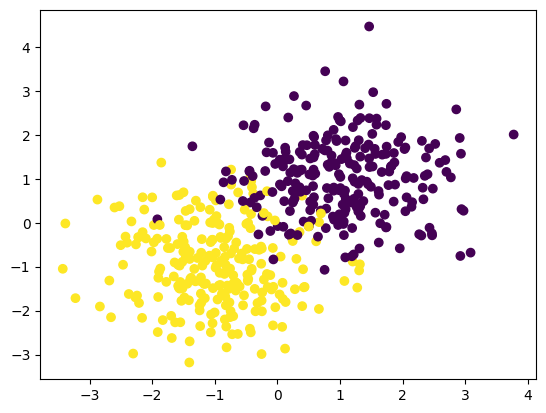

In [12]:
# dataset: two blobs
idataset = -1
X,y = generate_data(idataset, nsamples=500, random_state = 42)

# Create train and test sets as tensors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Network definition

In Pytorch, a network is defined as an object which inherits predefined methods used for learning (the [**`torch.nn.Module`**](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)).

In practice, you have to describe:
- The layers (defined as variables in the **`__init__`**)
- The architecture, i.e. the sequence of computations that yields the output from the input (the **`forward`** method).



In [13]:
# Definition of a simple network
class NetworkExample(torch.nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(2,1)

    def forward(self, x):

        y = self.l1(x)

        return y

The network architecture is accessible using`state_dict()`.



In [15]:
net = NetworkExample()
print(net.state_dict())

OrderedDict([('l1.weight', tensor([[0.6897, 0.4495]])), ('l1.bias', tensor([-0.6891]))])


## Learning phase

The learning phase requires several complementary features to be defined once the network is created and intialized:
- the learning loss
- the gradient learning rate
- the data sampling strategy
- ...

The following cell provides a rather generic learning function adapted to binary classification..

In [16]:
# Learning phase
def model_trainer_binary(model, optimizer, data_train, epochs=5, verbose=True):

  train_pts = data_train[0]
  train_labels = data_train[1]

  # Epoch: the number of times we see the entire dataset
  num_epoch = epochs

  # optimizer creation
  optimizer = optimizer

  # loss criterion
  criterion = torch.nn.BCEWithLogitsLoss()

  losses = []
  iterations = []
  total_iter_counter = 0
  for epoch in range(num_epoch):

      # set the network in training mode
      model.train()

      # create an iterator with progress bar
      t = tqdm(torch.randperm(train_pts.shape[0]))

      # variable to track the loss
      total_loss = 0

      epoch_iter_counter = 0

      # training loop
      for epoch_iter_counter,i in enumerate(t):

          # create the input / target tensors
          x = train_pts[i].reshape(1, 2)
          target = train_labels[i].reshape(1,1).float()

          # forward step
          y2 = model(x)

          # compute error loss
          loss = criterion(y2, target)

          # initialize the gradients to zero
          optimizer.zero_grad()

          # compute the backward pass
          loss.backward()

          # update the weights
          optimizer.step()

          # get the loss for the example and add it to the total loss
          total_loss += loss.item()
          #epoch_iter_counter += 1

          # print the average loss in the progress bar
          if verbose:
            t.set_description_str(f"Loss={total_loss/(1+epoch_iter_counter):.4e}")

          total_iter_counter += 1

      # Compute the loss over one epoch
      total_loss /= train_pts.shape[0]

      # Increment the loss sequence
      losses.append(total_loss)
      iterations.append(total_iter_counter)

  return (iterations, losses)


## Network optimization

Once the learning is defined, you have to start the actual optimization to learn the weights.

Loss=1.1966e-01: 100%|██████████| 335/335 [00:01<00:00, 255.63it/s]


Text(0, 0.5, 'Loss')

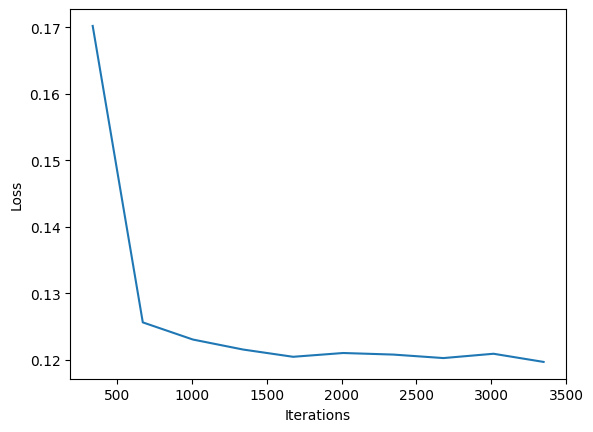

In [17]:
# Create the network
net = NetworkExample()

# Define the optimization strategy
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

# Learn and get the loss curves
learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=10, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])
plt.xlabel('Iterations')
plt.ylabel('Loss')


The following cell contains a function for displaying the decision surface once the network is learned.

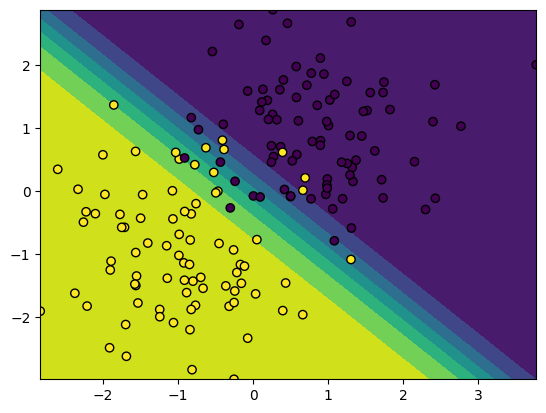

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

# Function for displaying decision surface
def display_2D_boundary(model, # network
                        points, # Evaluation data (pts, labels)
                        head = None, # If a decision layer is needed
                        pred_show = False # Shows decision regions rather than score
                        ):

  model.eval()

  pt_min = points[0].min(0).values.numpy()
  pt_max = points[0].max(0).values.numpy()
  feature_1, feature_2 = np.meshgrid(np.linspace(pt_min[0],pt_max[0]),np.linspace(pt_min[1],pt_max[1]))

  grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
  grid_t = torch.tensor(grid, dtype=torch.float32)

  with torch.no_grad():
    if head is not None:
      grid_pred = head(model(grid_t)).detach()
    else:
      grid_pred = model(grid_t).detach()

  if pred_show:
      grid_pred = (grid_pred > 0.5).long()

  y_pred = np.reshape(grid_pred, feature_1.shape)

  display = DecisionBoundaryDisplay(xx0=feature_1,
                                    xx1=feature_2,
                                    response=y_pred)
  display.plot()

  display.ax_.scatter(points[0][:, 0], points[0][:, 1], c=points[1], edgecolor="black")

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Another dataset

We are going to study the same network on a different problem.

Loss=2.5845e-01: 100%|██████████| 335/335 [00:01<00:00, 223.95it/s]


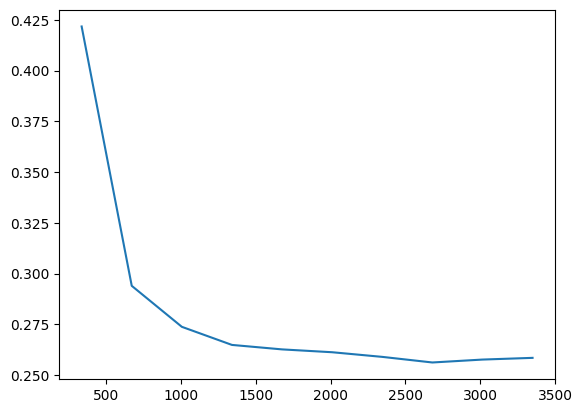

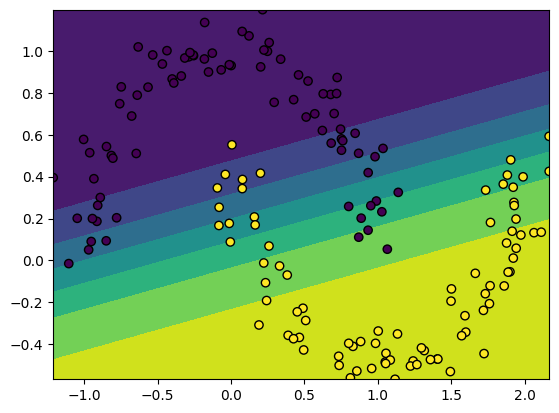

In [21]:
# dataset: two moons
idataset = 0
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create network
net = NetworkExample()

lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=10, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Adapt the architecture

A critical question when using neural networks is to find a good architecture that can approximate the decision function, but also that can be learned using gradient descent.

In this activity, we are going to change the network (as in the first part of the TD).



In [25]:
# Definition of the network
class NetworkTwoLayers(torch.nn.Module):
    def __init__(self, in_size, hidden_size, out_size, activation = torch.tanh) -> None:
        super().__init__()
        self.activation = activation
        self.l1 = torch.nn.Linear(in_size, hidden_size)
        self.l2 = torch.nn.Linear(hidden_size, out_size)

    def forward(self, x):
        y = self.l1(x)
        y = self.activation(y)
        y = self.l2(y)

        return y

In [26]:
# dataset
idataset = 0 # or 1 or 2
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create the network
net = NetworkTwoLayers(2, 8, 1, activation=torch.relu)


Loss=1.1730e-02: 100%|██████████| 335/335 [00:01<00:00, 226.57it/s]


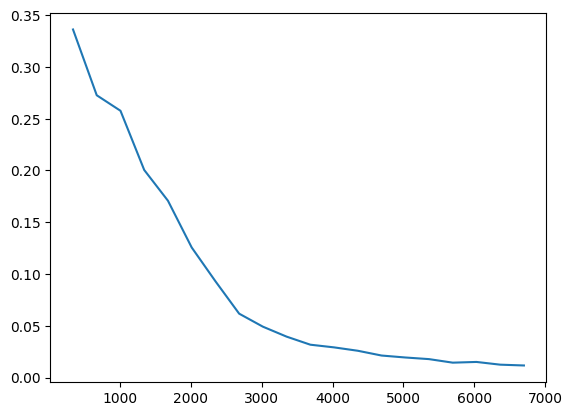

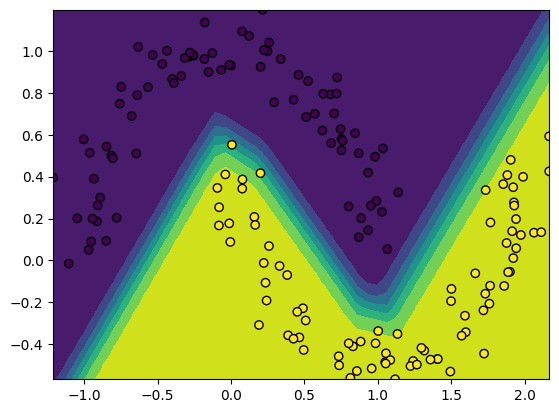

In [27]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=20, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Augment the number of layers

We are going to evaluate the impact of the number of layers in the architecture.


Text(0, 0.5, 'Number of weights & biases')

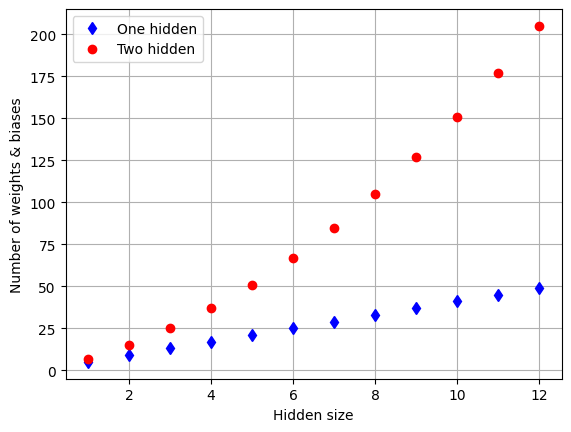

In [30]:
hsize = np.arange(1,13,1)

onelayer = [1]*12
twolayer = [2]*12

onelayer = 4*hsize+1
twolayer = hsize*hsize+5*hsize+1


plt.plot(hsize, onelayer, 'bd', label='One hidden')
plt.plot(hsize, twolayer, 'ro', label='Two hidden')
plt.legend()
plt.grid(True)
plt.xlabel('Hidden size')
plt.ylabel('Number of weights & biases')


In [31]:
# Network creation

class NetworkThreeLayers(torch.nn.Module):

    def __init__(self, in_size, hidden_size, out_size, activation = torch.tanh) -> None:
        super().__init__()
        self.activation = activation
        self.l1 = torch.nn.Linear(in_size, hidden_size)
        self.l2 = torch.nn.Linear(hidden_size, hidden_size)
        self.l3 = torch.nn.Linear(hidden_size, out_size)

    def forward(self, x):

        y = self.l1(x)
        y = self.activation(y)
        y = self.l2(y)
        y = self.activation(y)
        y = self.l3(y)

        return y

In [32]:
# dataset
idataset = 1 # or 0 or 2
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [34]:
# First Network (three layers)
net = NetworkTwoLayers(2, 9, 1, activation=torch.relu)

Loss=4.5571e-02: 100%|██████████| 335/335 [00:01<00:00, 175.09it/s]


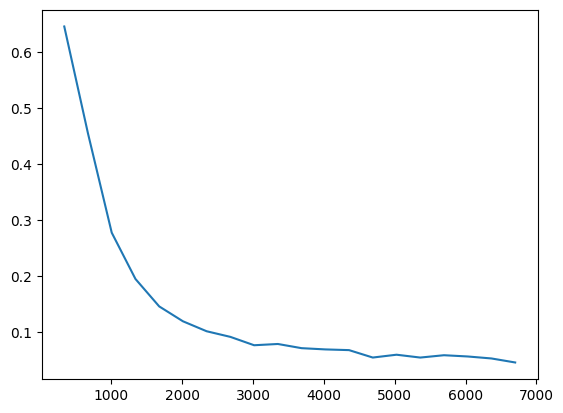

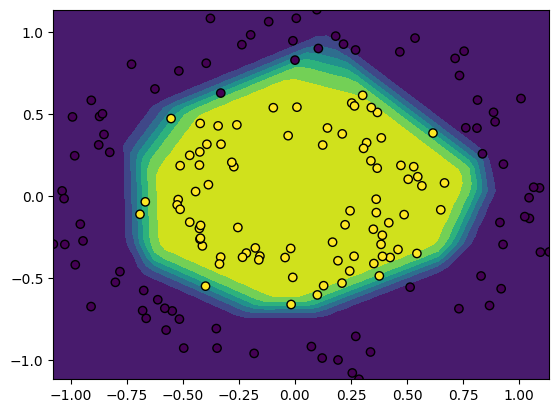

In [35]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=20, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

In [36]:
# Second network (Two layers)
net = NetworkTwoLayers(2, 9, 1, activation=torch.relu)

Loss=8.1127e-02: 100%|██████████| 335/335 [00:01<00:00, 279.57it/s]


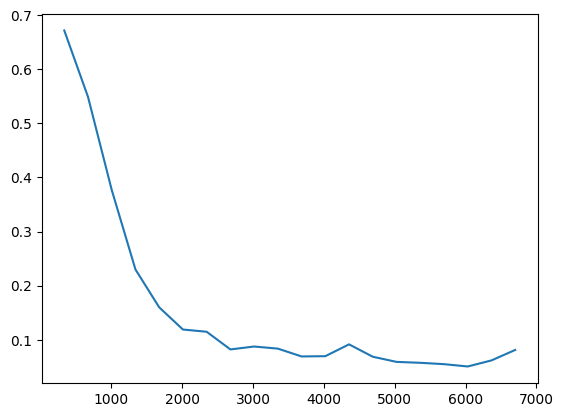

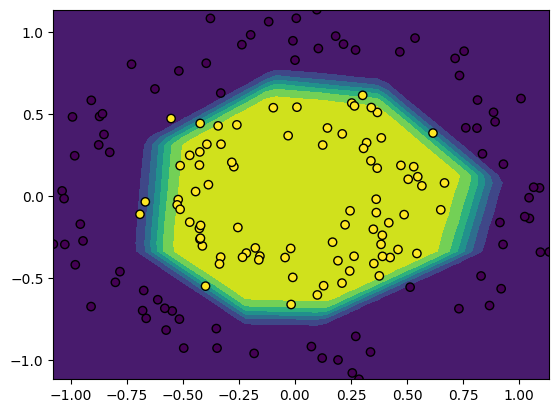

In [37]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves = model_trainer_binary(net, optimizer, (train_pts, train_labels),
              epochs=20, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = False)

## Learning parameters: batch size and momentum



### Batch size

We have seen that we can use batches of sample data to approximate the full gradient during the stochastic gradient descent.

In [38]:
def model_trainer_batch(model, optimizer, data_train, batch_size = 10, epochs=5, verbose=True):

  train_pts = data_train[0]
  train_labels = data_train[1]

  # Epoch: the number of times we see the entire dataset
  num_epoch = epochs

  # optimizer creation
  optimizer = optimizer

  # loss criterion
  criterion = torch.nn.BCEWithLogitsLoss()

  losses = []
  iterations = []
  total_iter_counter = 0
  for epoch in range(num_epoch):
      model.train()
      # create a data iterator with progress bar
      rand_ids = torch.randperm(train_pts.shape[0])
      t = tqdm(range(0, rand_ids.shape[0], batch_size))

      # variable to track the loss
      total_loss = 0

      epoch_iter_counter = 0

      # training loop
      for epoch_iter_counter,i in enumerate(t):

          ids = rand_ids[i:i+batch_size]
          x = train_pts[ids]
          target = train_labels[ids].unsqueeze(1).float()

          # forward
          y2 = model(x)

          # compute error
          loss = criterion(y2, target)

          # initialize the gradients to zero
          optimizer.zero_grad()

          # compute the backward pass
          loss.backward()

          # update the weights
          optimizer.step()

          # get the loss for the example and add it to the total loss
          total_loss += loss.item()

          # print the average loss in the progress bar
          if verbose:
            t.set_description_str(f"Loss={total_loss/(1+epoch_iter_counter):.4e}")

          total_iter_counter += 1

      # Compute the loss over one epoch
      total_loss /= train_pts.shape[0]

      # Increment the loss sequence
      losses.append(total_loss)
      iterations.append(total_iter_counter)

  return (iterations, losses)


In [39]:
# dataset: spiral
idataset = 3
# dataset: two moons
idataset = 0

X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create network
net = NetworkThreeLayers(2, 8, 1, activation=torch.relu)

Loss=2.2599e-01: 100%|██████████| 21/21 [00:00<00:00, 240.42it/s]


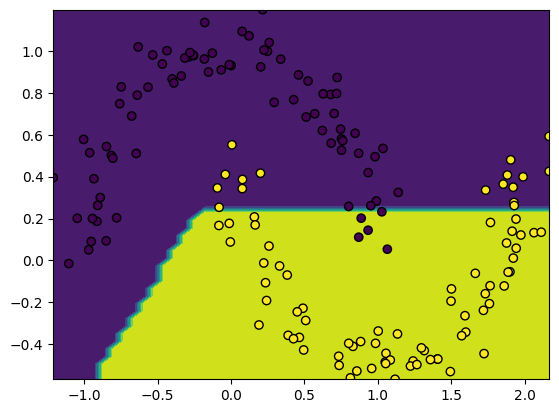

In [40]:
# Optimization
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr)

learning_curves_batch = model_trainer_batch(net, optimizer, (train_pts, train_labels),
              batch_size = 16, epochs=40, verbose=True)

# display the decision surface
display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = True)

### Adding a momentum

Depending on the batch size, the gradient descent may be unstable.

One solution is to increase the batch size (see previous) but depending on the problem it may not be always possible.

Another approach is to use **momentum** during the optimization.

$$v_t = \gamma v_{t-1} + (1-\gamma) \Delta w $$
$$w_t = w_{t-1} + \alpha v_t $$

In [41]:
# Create and initialize network
net = NetworkThreeLayers(2, 8, 1, activation=torch.relu)


Loss=1.7991e-04: 100%|██████████| 335/335 [00:01<00:00, 235.91it/s]


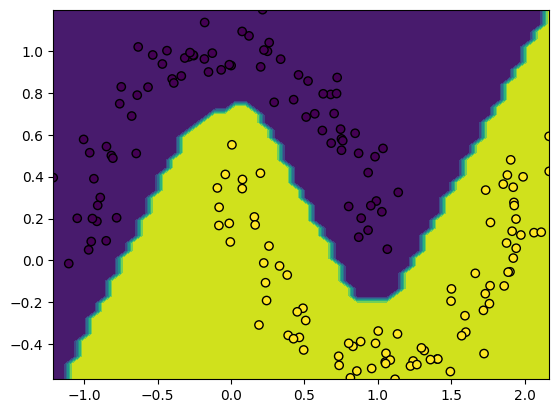

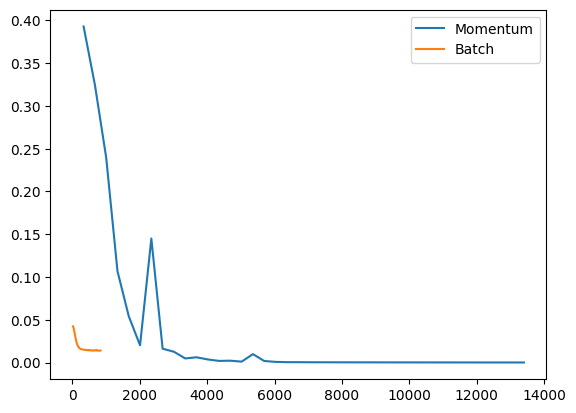

In [42]:
lr = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr, momentum = 0.1)

learning_curves_momentum = model_trainer_batch(net, optimizer, (train_pts, train_labels),
              batch_size = 1, epochs=40, verbose=True)

# display the decision surface
display_2D_boundary(net, (test_pts, test_labels), head = torch.sigmoid, pred_show = True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves_momentum[0], learning_curves_momentum[1], label='Momentum')
plt.plot(learning_curves_batch[0], learning_curves_batch[1], label='Batch')
plt.legend()


## Comparison with SVM



Best score = 0.99 with kernel rbf
Parameters are gamma = 0.046 and C =  1


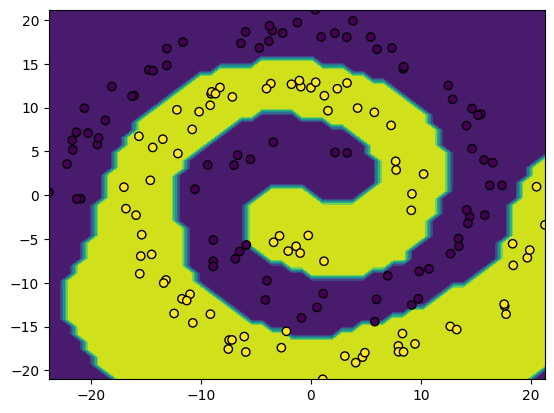

In [43]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# dataset: spiral
idataset = 3
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base classifier for cross-validation
svc = svm.SVC(shrinking=True,max_iter=1000000)

# Cross validation
parameters = [{'kernel':['rbf'],
              'C':np.logspace(-2, 2, 7),
              'gamma':np.logspace(-3, 2, 10)}]

clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(X_train, y_train)

# Result of the cross-validation
bestsvc = clf.best_estimator_

print("Best score = {:.2f} with kernel {}".format(clf.best_score_, bestsvc.kernel))
print("Parameters are gamma = {:.2g} and C = {:2g}".format(bestsvc.gamma, bestsvc.C))

# Display decision surfaces
pt_min = X_test.min(0)
pt_max = X_test.max(0)
feature_1, feature_2 = np.meshgrid(np.linspace(pt_min[0],pt_max[0]),np.linspace(pt_min[1],pt_max[1]))

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

y_pred = bestsvc.predict(grid)
y_pred = np.reshape(y_pred, feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1,
                                    xx1=feature_2,
                                    response=y_pred)
display.plot()

display.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="black")


## Multi-label classification

One of the big advantages of neural network is to solve the multiple class problem using a unique loss to optimize. We give in the following a series of cells abel to solve the multiclass problem.

In [44]:
def model_trainer_batch_multilabel(model, optimizer, data_train, batch_size = 10, epochs=5, verbose=True):

  train_pts = data_train[0]
  train_labels = data_train[1]
  num_epoch = epochs

  # optimizer creation
  optimizer = optimizer

  # loss criterion
  criterion = torch.nn.CrossEntropyLoss()

  losses = []
  iterations = []
  total_iter_counter = 0
  for epoch in range(num_epoch):

      # set the network in training mode
      model.train()

      # create an iterator with progress bar
      rand_ids = torch.randperm(train_pts.shape[0])
      t = tqdm(range(0, rand_ids.shape[0], batch_size))

      # variable to track the loss
      total_loss = 0

      epoch_iter_counter = 0

      # training loop
      for epoch_iter_counter,i in enumerate(t):

          # create the input / target tensors
          ids = rand_ids[i:i+batch_size]
          x = train_pts[ids]
          target = train_labels[ids].long()

          # forward
          y2 = model(x)

          # compute error
          loss = criterion(y2, target)

          # initialize the gradients to zero
          optimizer.zero_grad()

          # compute the backward pass
          loss.backward()

          # update the weights
          optimizer.step()

          # get the loss for the example and add it to the total loss
          total_loss += loss.item()

          # print the average loss in the progress bar
          if verbose:
            t.set_description_str(f"Loss={total_loss/(1+epoch_iter_counter):.4e}")

          total_iter_counter += 1

      total_loss /= train_pts.shape[0]
      losses.append(total_loss)
      iterations.append(total_iter_counter)

  return (iterations, losses)


In [47]:
from sklearn.inspection import DecisionBoundaryDisplay

def display_2D_multilabel(model, # network
                        points # Evaluation data
                        ):

  model.eval()

  pt_min = points[0].min(0).values.numpy()
  pt_max = points[0].max(0).values.numpy()
  feature_1, feature_2 = np.meshgrid(np.linspace(pt_min[0],pt_max[0]),np.linspace(pt_min[1],pt_max[1]))

  grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
  grid_t = torch.tensor(grid, dtype=torch.float32)

  with torch.no_grad():
    pred_test = net(grid_t)
    grid_pred = torch.argmax(pred_test,1)

  y_pred = np.reshape(grid_pred, feature_1.shape)

  display = DecisionBoundaryDisplay(xx0=feature_1,
                                    xx1=feature_2,
                                    response=y_pred)
  display.plot()

  display.ax_.scatter(points[0][:, 0], points[0][:, 1], c=points[1], edgecolor="black")



In [48]:
# Four moons dataset
idataset = 5
X,y = generate_data(idataset, nsamples=500, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pts, train_labels = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
test_pts, test_labels = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Create network
net = NetworkThreeLayers(2, 8, 4, activation=torch.tanh)


Loss=2.0125e-03: 100%|██████████| 21/21 [00:00<00:00, 180.07it/s]


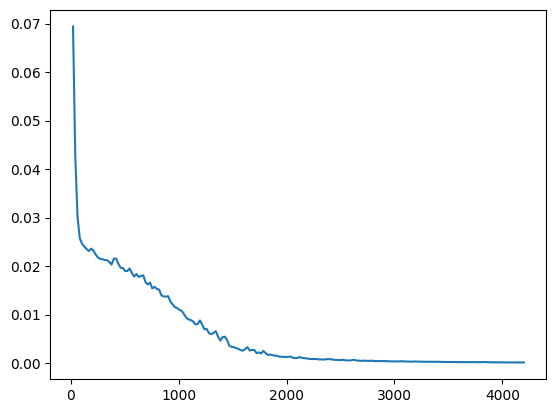

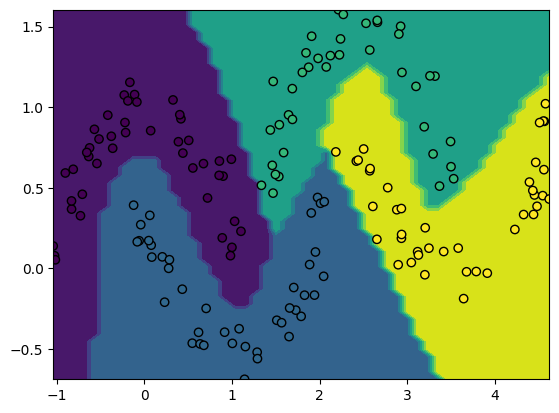

In [49]:

lr = 1e-1; optimizer = torch.optim.SGD(net.parameters(), lr)

# An adaptive learning rate strategy
lr = 1e-2; optimizer = torch.optim.Adam(net.parameters(), lr)

learning_curves = model_trainer_batch_multilabel(net, optimizer, (train_pts, train_labels),
              batch_size = 16, epochs=200, verbose=True)

# display the loss evolution
plt.figure()
plt.plot(learning_curves[0], learning_curves[1])

# display the decision surface
display_2D_multilabel(net, (test_pts, test_labels))